## "Análisis Global del Asilo y Refugio: Enfoque en la Crisis Venezolana"

1. Objetivo del Proyecto
Analizar los datos de asilo y refugio proporcionados por ACNUR para:

Identificar patrones globales de migración forzada.

Evaluar tendencias temporales y geográficas.

Profundizar en el caso de Venezuela como una de las mayores crisis migratorias actuales.

Extraer insights que puedan ayudar a ONGs, investigadores o gobiernos a entender mejor la situación.




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar y explorar los datos

In [2]:
file_path = "/content/persons_of_concern_demographics.csv"
df = pd.read_csv(file_path)


In [3]:
df.head(), df.columns.tolist()

(   Year Country of Asylum                   Country of Origin  \
 0  2013         Argentina  Venezuela (Bolivarian Republic of)   
 1  2013         Australia  Venezuela (Bolivarian Republic of)   
 2  2013            Brazil  Venezuela (Bolivarian Republic of)   
 3  2013            Canada  Venezuela (Bolivarian Republic of)   
 4  2013          Colombia  Venezuela (Bolivarian Republic of)   
 
   Country of Asylum ISO Country of Origin ISO  Female 0 - 4  Female 5 - 11  \
 0                   ARG                   VEN             0              0   
 1                   AUS                   VEN             0              0   
 2                   BRA                   VEN             0              8   
 3                   CAN                   VEN             0             20   
 4                   COL                   VEN             0             11   
 
    Female 12 - 17  Female 18 - 59  Female 60+  Female Other  Female Total  \
 0               0               0           0  

# 2. Exploración general

In [4]:
# Dimensiones y columnas
print("Dimensiones:", df.shape)
print("Columnas:", df.columns.tolist())

# Años disponibles
print("Años:", df['Year'].unique())

# Países de asilo únicos
print("Número de países de asilo:", df['Country of Asylum'].nunique())
print("Ejemplos:", df['Country of Asylum'].unique()[:10])

# Verificación de nulos
print("Valores nulos por columna:\n", df.isnull().sum())


Dimensiones: (544, 20)
Columnas: ['Year', 'Country of Asylum', 'Country of Origin', 'Country of Asylum ISO', 'Country of Origin ISO', 'Female 0 - 4', 'Female 5 - 11', 'Female 12 - 17', 'Female 18 - 59', 'Female 60+', 'Female Other', 'Female Total', 'Male 0 - 4', 'Male 5 - 11', 'Male 12 - 17', 'Male 18 - 59', 'Male 60+', 'Male Other', 'Male Total', 'Total']
Años: [2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]
Número de países de asilo: 71
Ejemplos: ['Argentina' 'Australia' 'Brazil' 'Canada' 'Colombia' 'Costa Rica'
 'Ecuador' 'Finland' 'France'
 'United Kingdom of Great Britain and Northern Ireland']
Valores nulos por columna:
 Year                     0
Country of Asylum        0
Country of Origin        0
Country of Asylum ISO    0
Country of Origin ISO    0
Female 0 - 4             0
Female 5 - 11            0
Female 12 - 17           0
Female 18 - 59           0
Female 60+               0
Female Other             0
Female Total             0
Male 0 - 4               0


In [6]:
# Agrupar por país de asilo y sumar total de personas
asilo_totales = df.groupby('Country of Asylum')['Total'].sum().sort_values(ascending=False)

# Top 10 países que más han recibido
print(" Top 10 países receptores:")
print(asilo_totales.head(10))

# Bottom 10 países que menos han recibido
print(" 10 países con menor cantidad de solicitantes:")
print(asilo_totales.tail(10))


 Top 10 países receptores:
Country of Asylum
Colombia                              14809371
Venezuela (Bolivarian Republic of)    10000500
Peru                                   8678053
Chile                                  3213967
Ecuador                                3040034
Brazil                                 2569095
United States of America               2353478
Argentina                              1262150
Spain                                   871323
Panama                                  788837
Name: Total, dtype: int64
 10 países con menor cantidad de solicitantes:
Country of Asylum
Israel                20
Bulgaria              15
Montenegro            10
Kyrgyzstan            10
Lebanon               10
Estonia                6
Croatia                6
Cyprus                 5
Hungary                5
Russian Federation     5
Name: Total, dtype: int64


In [8]:
# Crear una copia del DataFrame, excluyendo registros donde Venezuela aparece como país de asilo
df_limpio = df[df['Country of Asylum'] != 'Venezuela (Bolivarian Republic of)'].copy()

# Confirmar el resultado
print(f"Registros antes: {df.shape[0]}")
print(f"Registros después del filtrado: {df_limpio.shape[0]}")


Registros antes: 544
Registros después del filtrado: 538


In [9]:
# Nuevo top 10 países receptores con datos depurados
asilo_validos = df_limpio.groupby('Country of Asylum')['Total'].sum().sort_values(ascending=False)
print("✅ Top 10 países receptores (Venezuela excluida):")
print(asilo_validos.head(10))


✅ Top 10 países receptores (Venezuela excluida):
Country of Asylum
Colombia                    14809371
Peru                         8678053
Chile                        3213967
Ecuador                      3040034
Brazil                       2569095
United States of America     2353478
Argentina                    1262150
Spain                         871323
Panama                        788837
Mexico                        785580
Name: Total, dtype: int64


Ver la distribucion de los venezolanos geograficamente utilizando Folium

In [11]:
!pip install folium
!pip install geopy



In [12]:
from geopy.geocoders import Nominatim
import time

# Inicializar geolocalizador
geolocator = Nominatim(user_agent="asilo-map")

# Crear DataFrame de países y total de solicitantes
map_data = df_limpio.groupby('Country of Asylum')['Total'].sum().reset_index()

# Obtener coordenadas de cada país
def get_coords(country):
    try:
        location = geolocator.geocode(country)
        time.sleep(1)  # Para evitar bloqueo del servicio
        return (location.latitude, location.longitude)
    except:
        return (None, None)

map_data[['lat', 'lon']] = map_data['Country of Asylum'].apply(get_coords).apply(pd.Series)

# Verificar
map_data.dropna(subset=['lat', 'lon'], inplace=True)
map_data.head()


,Country of Asylum,Total,lat,lon
0,Albania,40,41.000028,19.999962
1,Anguilla,82,18.195495,-63.075023
2,Antigua and Barbuda,54,17.223472,-61.955461
3,Argentina,1262150,-34.996496,-64.967282
4,Aruba,112707,12.501363,-69.961848


In [18]:
import folium

# Crear el mapa centrado en América Latina
mapa = folium.Map(location=[10, -60], zoom_start=3)

# Agregar círculos por país
for i, row in map_data.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=max(row['Total'] / 1000000, 2),  # Escala ajustable
        popup=f"{row['Country of Asylum']}: {row['Total']:,} personas",
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(mapa)

# Mostrar
mapa


Al observar el mapa me parece interesante evaluar esos 10 venezolanos que solicitaron asilo en Kyrgyztan entre 2013 y 2024

Evaluacion de la distribución de venezolanos por genero

In [21]:
# Excluir registros donde Venezuela sea el país de asilo
df_ven_clean = df_ven[df_ven['Country of Asylum'] != 'Venezuela (Bolivarian Republic of)']

# Agrupar por país de asilo y sumar
genero_por_pais = df_ven_clean.groupby('Country of Asylum')[['Female Total', 'Male Total']].sum().reset_index()

# Añadir columna Total y ordenar
genero_por_pais['Total'] = genero_por_pais['Female Total'] + genero_por_pais['Male Total']
genero_por_pais = genero_por_pais.sort_values(by='Total', ascending=False)

# Mostrar el top 10
print(genero_por_pais.head(10))


   Country of Asylum  Female Total  Male Total     Total
15          Colombia       7544497     7130703  14675200
54              Peru       1439236     1536057   2975293
23           Ecuador       1246047     1107849   2353896
14             Chile        996158      974557   1970715
3          Argentina        347486      332334    679820
62             Spain        245296      220426    465722
10            Brazil        125460      148844    274304
52            Panama        125990      121009    246999
47            Mexico         77213       89448    166661
22    Dominican Rep.         86645       63903    150548


## Evaluar el caso de Kyrgyztan

In [24]:
df_kyrgyz = df[
    (df['Country of Origin'] == 'Venezuela (Bolivarian Republic of)') &
    (df['Country of Asylum'] == 'Kyrgyzstan')
]

In [25]:
print(df_kyrgyz[
    ['Year',
     'Female 0 - 4', 'Female 5 - 11', 'Female 12 - 17', 'Female 18 - 59', 'Female 60+',
     'Male 0 - 4', 'Male 5 - 11', 'Male 12 - 17', 'Male 18 - 59', 'Male 60+',
     'Female Total', 'Male Total', 'Total']
])

     Year  Female 0 - 4  Female 5 - 11  Female 12 - 17  Female 18 - 59  \
350  2021             0              5               0               0   
413  2022             0              5               0               0   

     Female 60+  Male 0 - 4  Male 5 - 11  Male 12 - 17  Male 18 - 59  \
350           0           0            0             0             0   
413           0           0            0             0             0   

     Male 60+  Female Total  Male Total  Total  
350         0             5           0      5  
413         0             5           0      5  


Esto esta interesante 5 niñas en 2021 y 5 niñas mas en 2022, 10 niñas en el rango de los 5 a 11 años de edad fueron a solicitar asilo solas en Kyrgyztan ¿ Sin acompañante ?, aun pais tan lejano y culturalmente diferente, ¿ Acaso trata de personas? , o será un simple error de datos, pero dos años seguidos.

Vamos a ver en que otros paises se aprecia algo similar

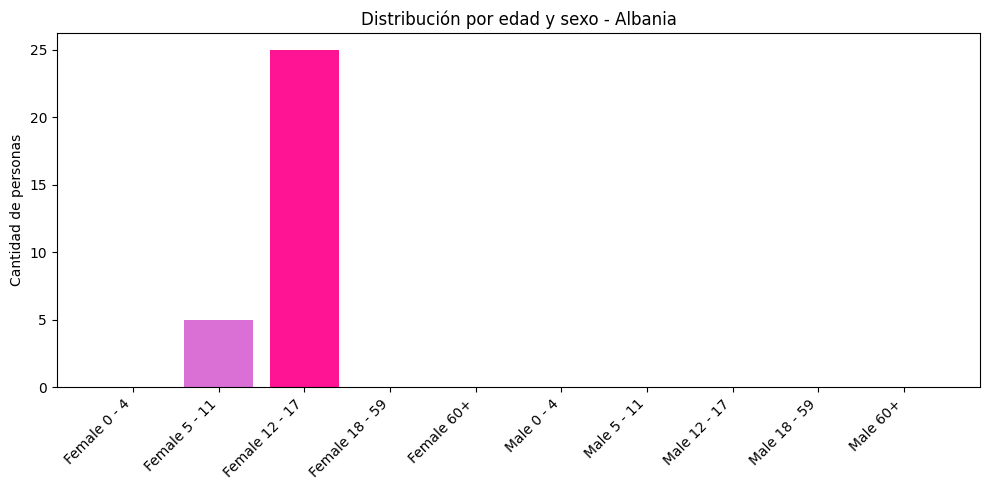

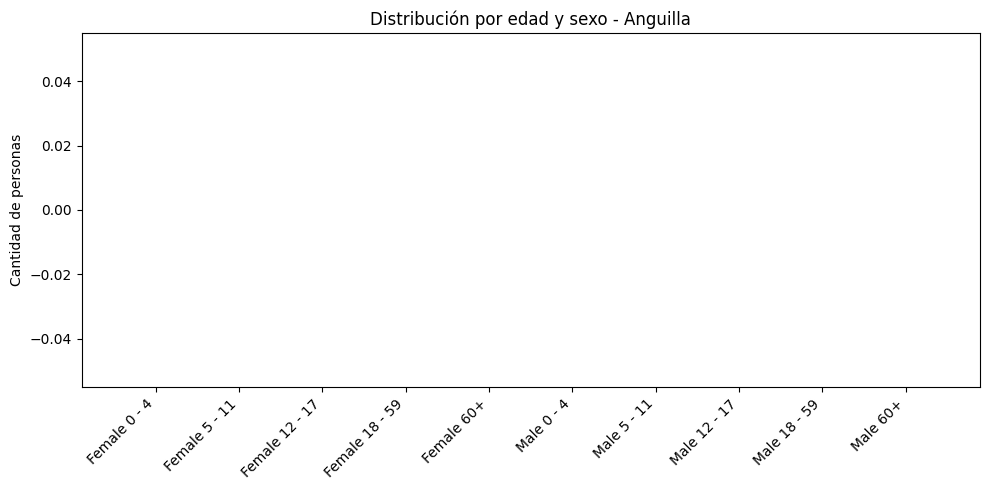

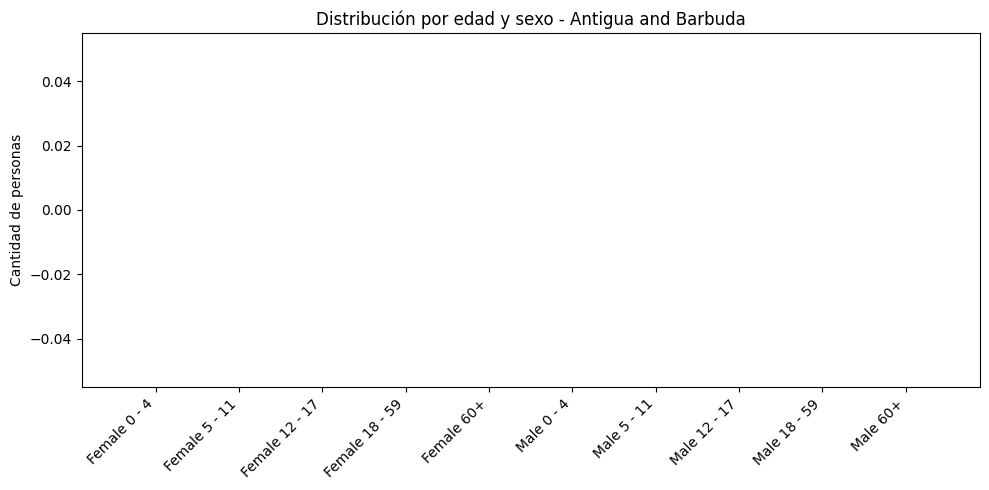

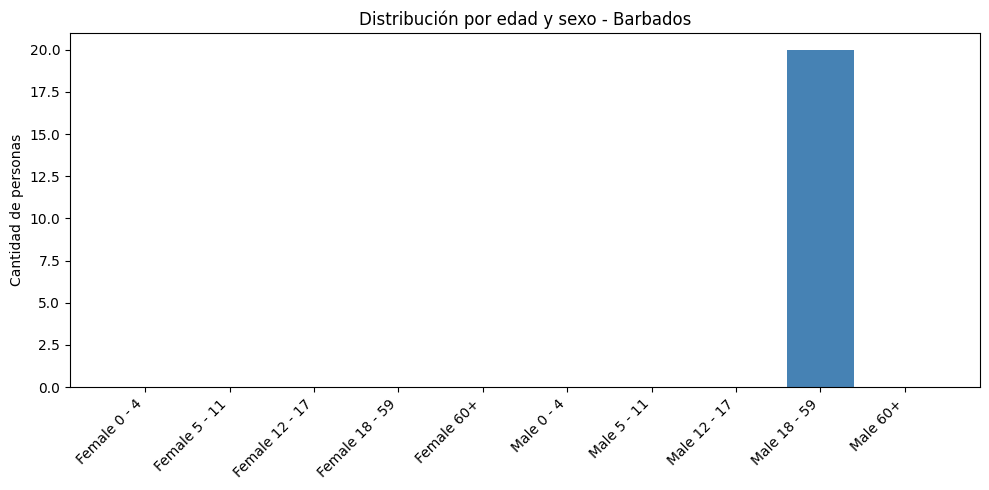

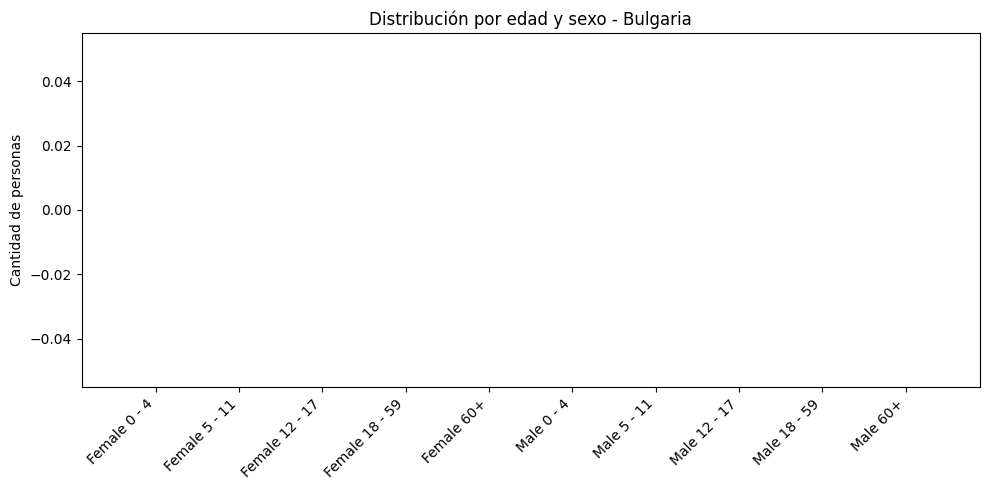

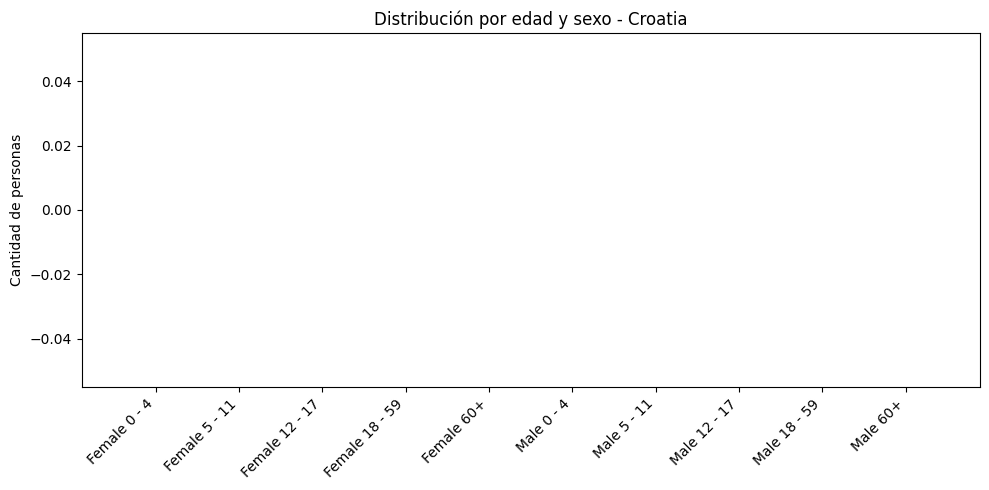

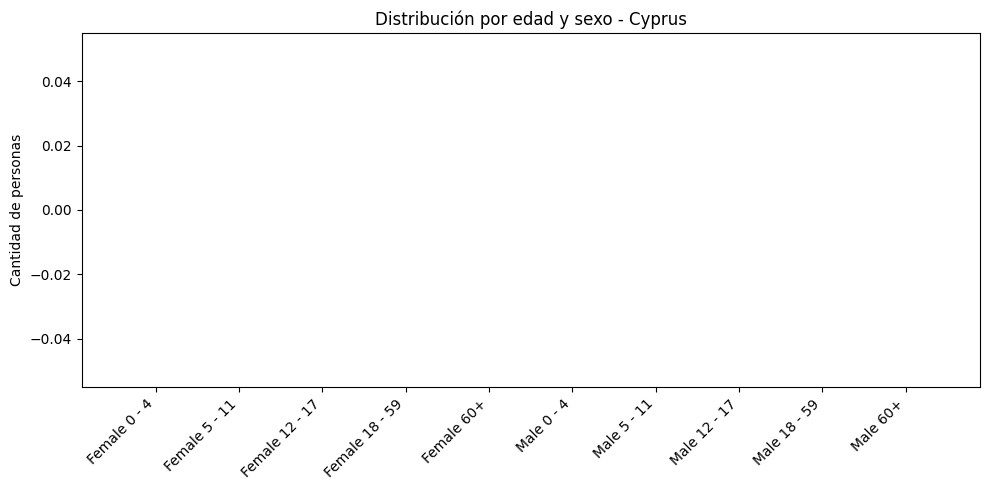

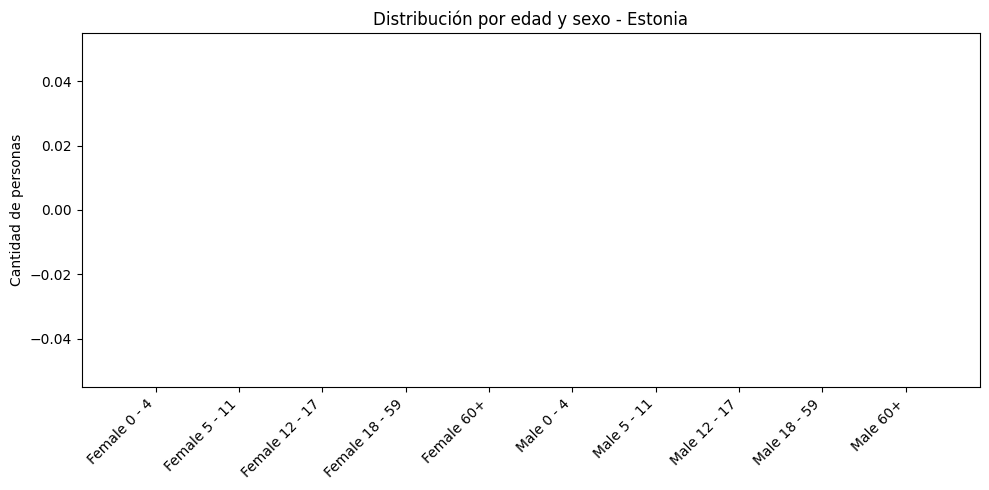

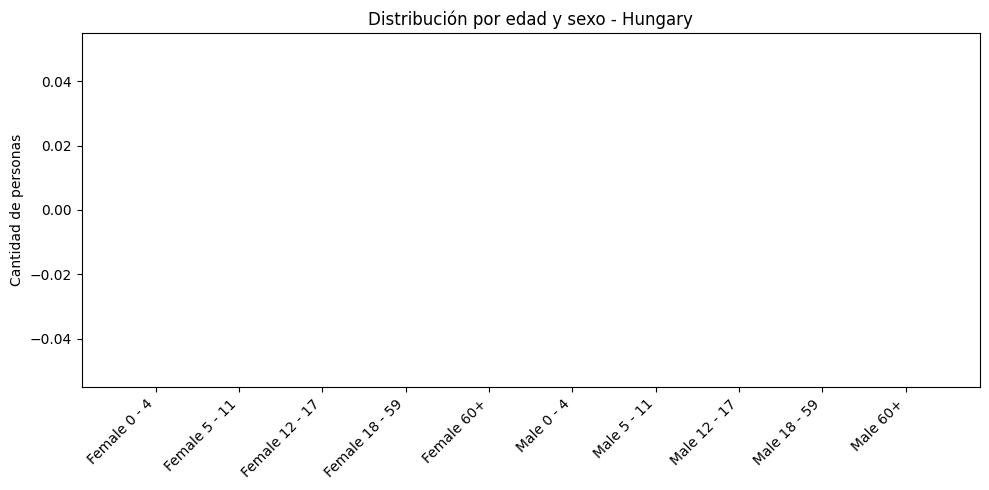

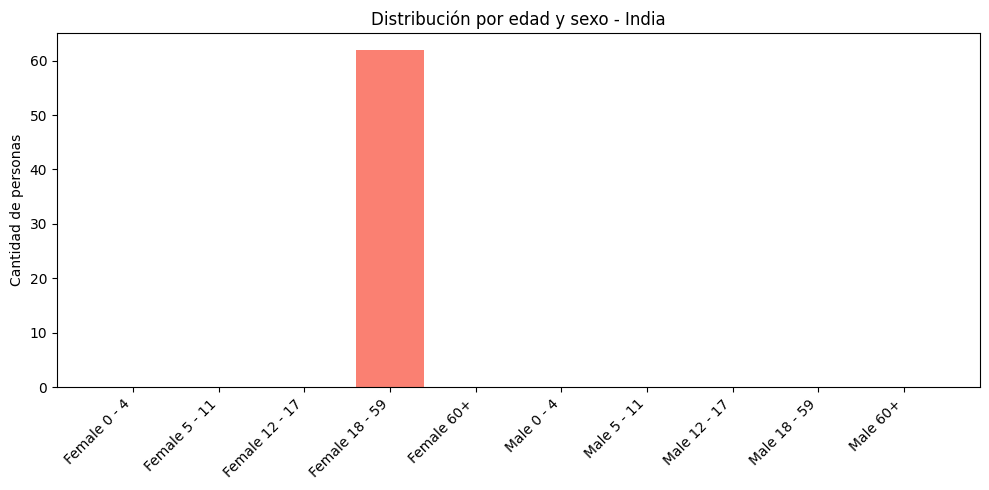

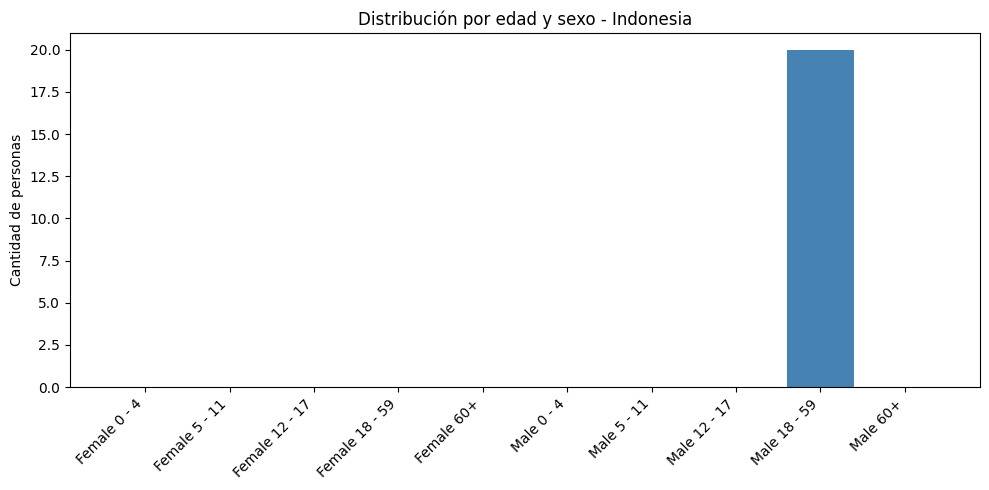

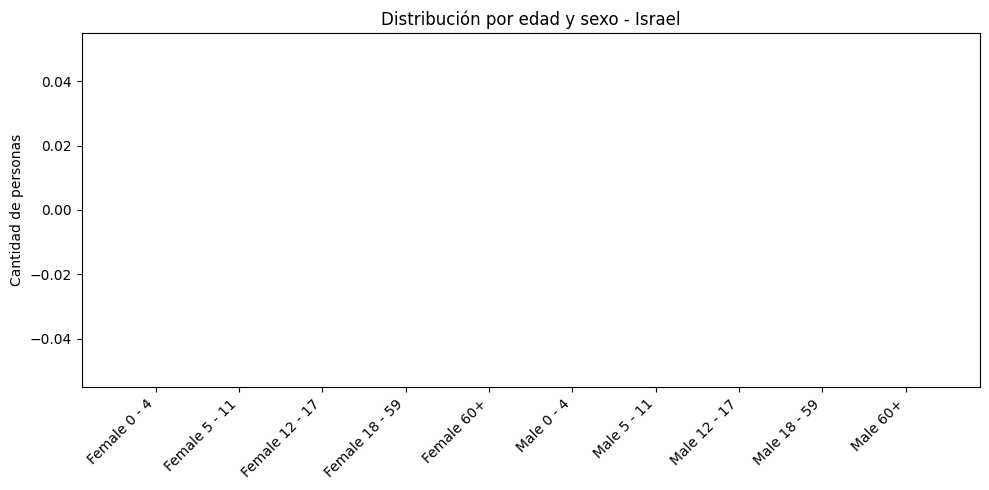

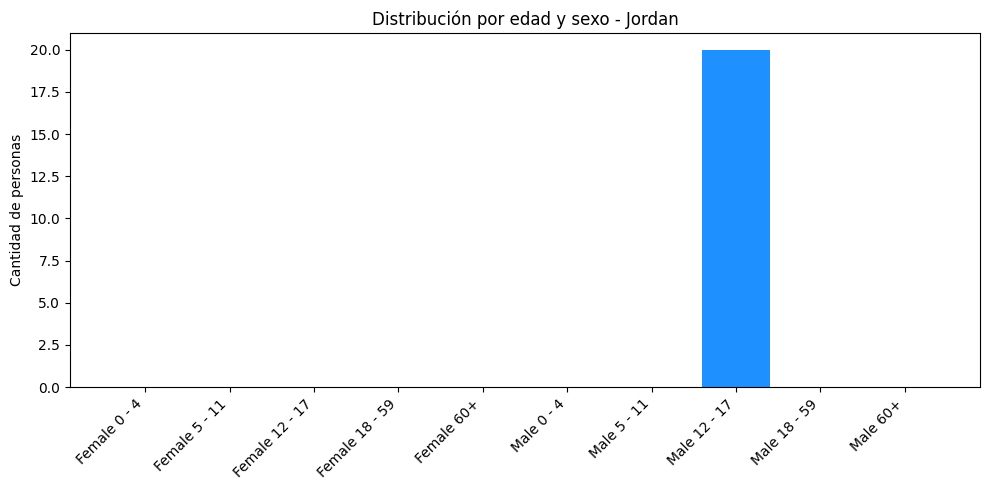

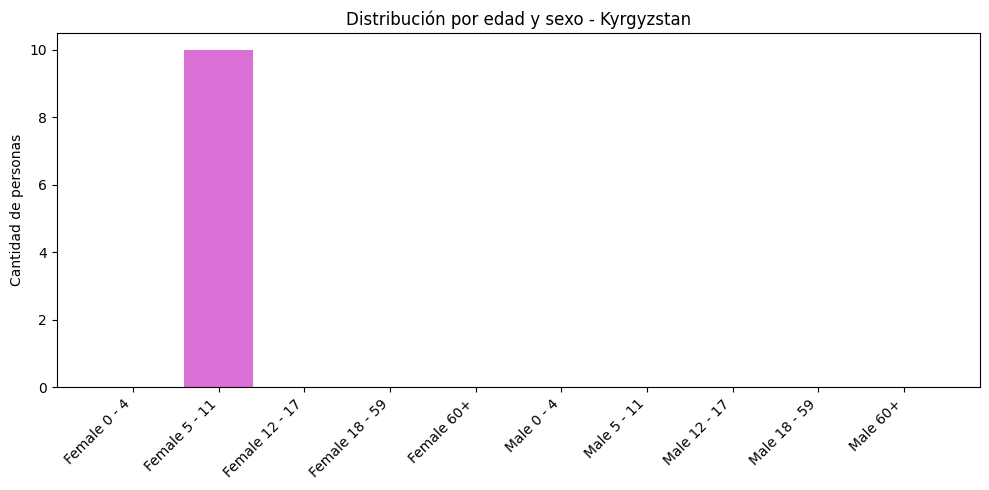

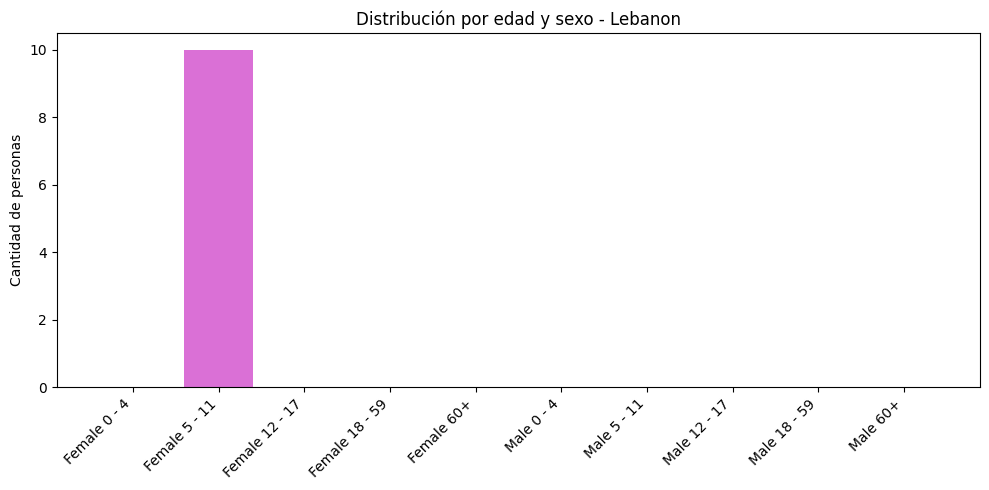

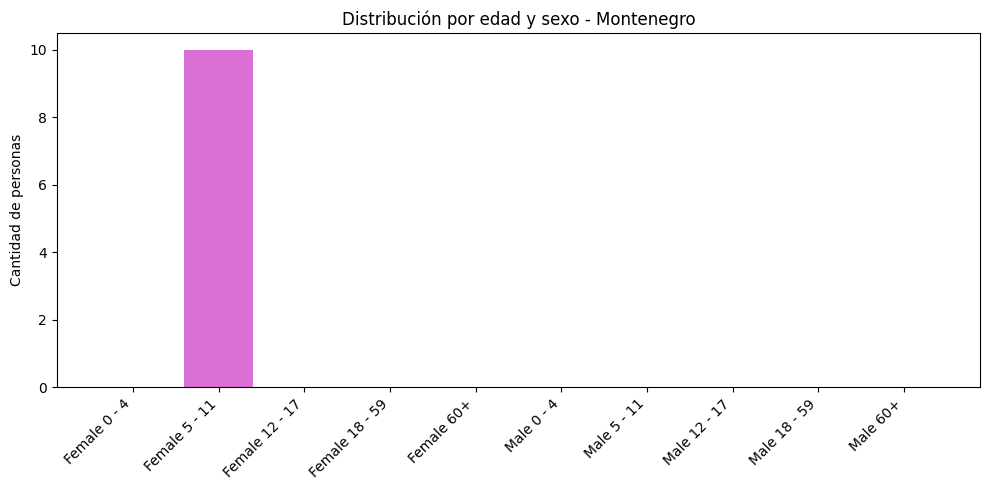

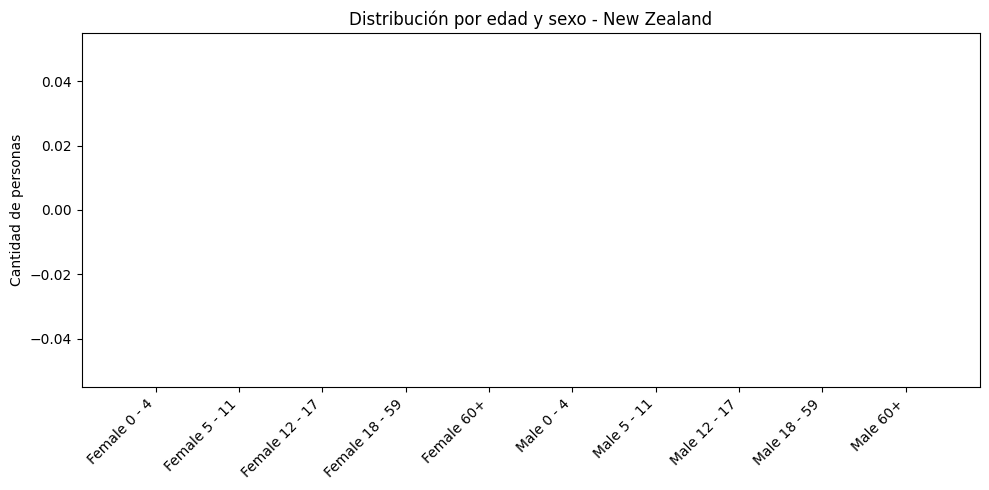

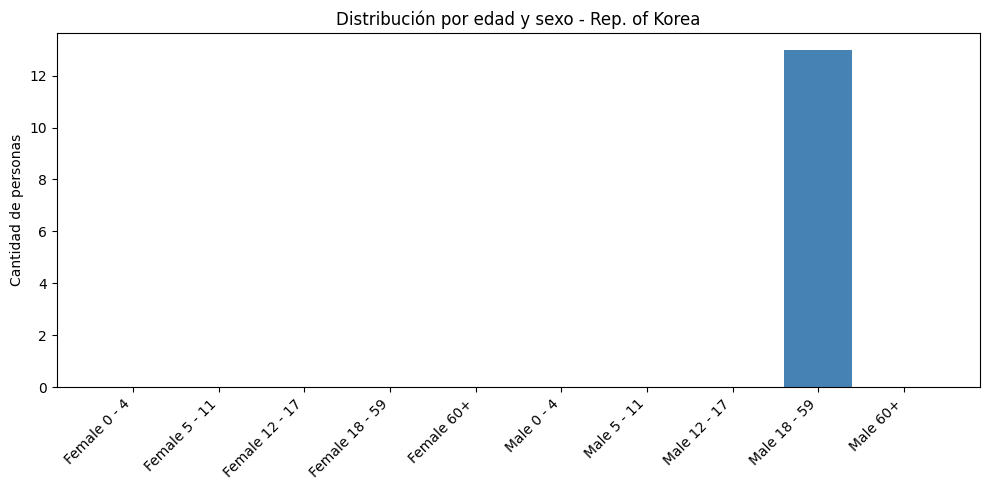

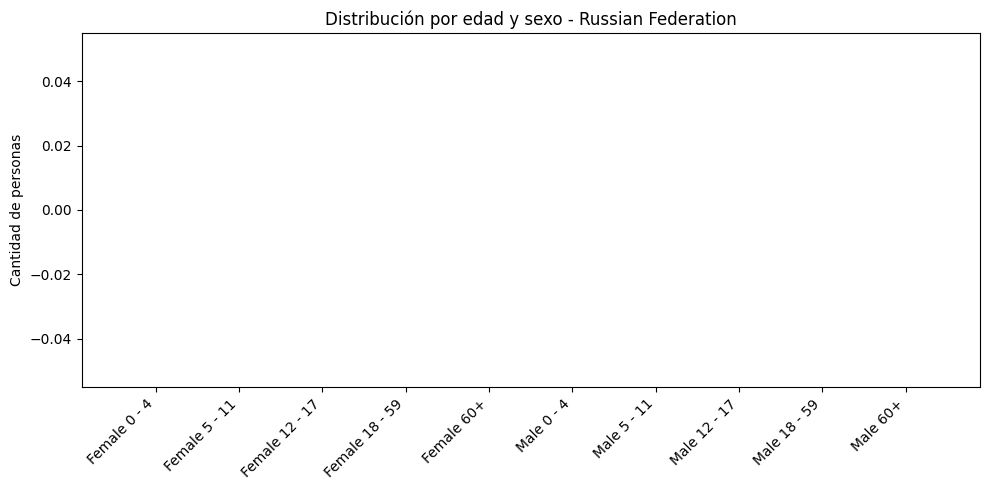

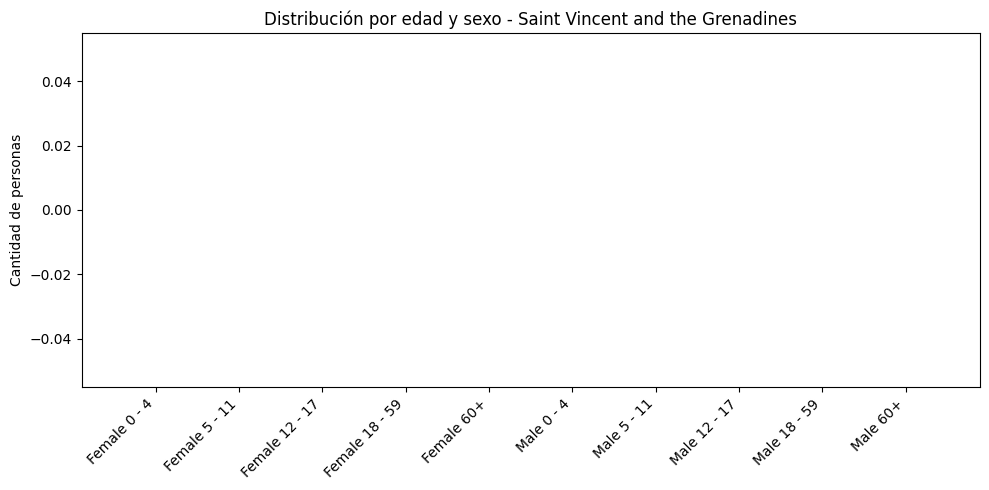

In [30]:
# Filtrar por país de origen = Venezuela
df_ven = df[df['Country of Origin'] == 'Venezuela (Bolivarian Republic of)']

# Grupos de edad y sexo a incluir
grupos = [
    'Female 0 - 4', 'Female 5 - 11', 'Female 12 - 17',
    'Female 18 - 59', 'Female 60+',
    'Male 0 - 4', 'Male 5 - 11', 'Male 12 - 17',
    'Male 18 - 59', 'Male 60+'
]

# Agrupar por país de asilo y sumar los grupos
grouped = df_ven.groupby('Country of Asylum')[grupos + ['Total']].sum().reset_index()

# Filtrar países con menos de 100 personas
low_migration = grouped[grouped['Total'] < 100]

# Graficar uno por uno
for idx, row in low_migration.iterrows():
    country = row['Country of Asylum']
    values = [row[grp] for grp in grupos]

    plt.figure(figsize=(10, 5))
    plt.bar(grupos, values, color=[
        'pink', 'orchid', 'deeppink', 'salmon', 'lightcoral',
        'skyblue', 'deepskyblue', 'dodgerblue', 'steelblue', 'navy'
    ])
    plt.title(f'Distribución por edad y sexo - {country}')
    plt.ylabel('Cantidad de personas')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



Seguimos indagando, ya que encontramos otros paises con casos similares

In [31]:
# Filtrar por Venezuela como país de origen
df_ven = df[df['Country of Origin'] == 'Venezuela (Bolivarian Republic of)']

# Grupos a considerar
grupos = [
    'Female 0 - 4', 'Female 5 - 11', 'Female 12 - 17',
    'Female 18 - 59', 'Female 60+',
    'Male 0 - 4', 'Male 5 - 11', 'Male 12 - 17',
    'Male 18 - 59', 'Male 60+'
]

# Agrupar por país de asilo
grouped = df_ven.groupby('Country of Asylum')[grupos + ['Female Total', 'Male Total', 'Total']].sum().reset_index()

# Filtrar países con menos de 100 personas
low_migration = grouped[grouped['Total'] < 100]

# Ordenar por Total descendente
low_migration = low_migration.sort_values(by='Total', ascending=False)

# Mostrar tabla
print(low_migration.to_string(index=False))

               Country of Asylum  Female 0 - 4  Female 5 - 11  Female 12 - 17  Female 18 - 59  Female 60+  Male 0 - 4  Male 5 - 11  Male 12 - 17  Male 18 - 59  Male 60+  Female Total  Male Total  Total
                        Anguilla             0              0               0               0           0           0            0             0             0         0             0           0     82
                           India             0              0               0              62           0           0            0             0             0         0            62           0     62
Saint Vincent and the Grenadines             0              0               0               0           0           0            0             0             0         0             0           0     62
             Antigua and Barbuda             0              0               0               0           0           0            0             0             0         0             0          

Es muy extraño que aparezcan niñas venezolanas solas y menores de edad solicitando asilo en Albania , Montenegro , Líbano y Kyrgyzstan, tambien es muy extraño esas 62 mujeres solicitando asilo en la India, un pais extremadamente hostil para las mujeres. Hay paises como Rusia o Israel que no tienen informacion de la edad o genero de las personas solo del total.  

Estos países presentan solo niñas entre 5–17 años y cero adultos acompañantes:

Albania	30 ; Montenegro	10 ;	Líbano	10 ;	Kyrgyzstan	10	.



## Evaluando los casos de estos paises por separado para encontrar mas informacion

Caso de Albania

In [33]:
df_albania = df[
    (df['Country of Origin'] == 'Venezuela (Bolivarian Republic of)') &
    (df['Country of Asylum'] == 'Albania')
]

print(df_albania [
    ['Year',
     'Female 0 - 4', 'Female 5 - 11', 'Female 12 - 17', 'Female 18 - 59', 'Female 60+',
     'Male 0 - 4', 'Male 5 - 11', 'Male 12 - 17', 'Male 18 - 59', 'Male 60+',
     'Female Total', 'Male Total', 'Total']
])

     Year  Female 0 - 4  Female 5 - 11  Female 12 - 17  Female 18 - 59  \
108  2017             0              5               0               0   
149  2018             0              0               5               0   
195  2019             0              0               5               0   
251  2020             0              0               5               0   
314  2021             0              0               5               0   
379  2022             0              0               5               0   
438  2023             0              0               0               0   
492  2024             0              0               0               0   

     Female 60+  Male 0 - 4  Male 5 - 11  Male 12 - 17  Male 18 - 59  \
108           0           0            0             0             0   
149           0           0            0             0             0   
195           0           0            0             0             0   
251           0           0            0     

En la tabla anterior correspondiente a Albania podemos detallar varias cosas:

2017: Aparecen 5 niñas de 5–11 años → son probablemente entre 6 y 10 años.

2018–2022: Aparecen 5 niñas ahora figuran como 12–17 años cada año consecutivo → muy probablemente se trata del mismo grupo.

2023–2024: De forma insólita, desaparecen las niñas, pero la columna Total aún marca 5 personas, sin desglose por sexo ni edad.

Señales de Alerta:
Migración sin acompañantes adultos durante 6 años consecutivos.
Ningún hombre o mujer mayor registrado en ningún año.
El valor total de 2023–2024 sigue siendo "5" pero sin ninguna categoría demográfica,  esto sugiere un problema de calidad de datos o manipulación/reportes inconsistentes.
Albania no es un destino típico de la migración venezolana ,el caso es excepcional.

Caso de Líbano

In [34]:
df_Lebanon = df[
    (df['Country of Origin'] == 'Venezuela (Bolivarian Republic of)') &
    (df['Country of Asylum'] == 'Lebanon')
]

print(df_Lebanon [
    ['Year',
     'Female 0 - 4', 'Female 5 - 11', 'Female 12 - 17', 'Female 18 - 59', 'Female 60+',
     'Male 0 - 4', 'Male 5 - 11', 'Male 12 - 17', 'Male 18 - 59', 'Male 60+',
     'Female Total', 'Male Total', 'Total']
])

     Year  Female 0 - 4  Female 5 - 11  Female 12 - 17  Female 18 - 59  \
288  2020             0              5               0               0   
352  2021             0              5               0               0   

     Female 60+  Male 0 - 4  Male 5 - 11  Male 12 - 17  Male 18 - 59  \
288           0           0            0             0             0   
352           0           0            0             0             0   

     Male 60+  Female Total  Male Total  Total  
288         0             5           0      5  
352         0             5           0      5  


El caso de Líbano es similar solo aparecen en 2020 y 2021 (no antes ni después).

El grupo son 5 niñas entre 5 y 11 años.

Sin adultos, ni mujeres , sin hombres, ni siquiera otras niñas y niños en otros rangos de edad.
Puede ser que no sean 10 en total pueden que sean las mismas 5 niñas .
Líbano es un pais que estaba en crisis financiera e inestabilidad desde antes de 2020, es extraño que 5 niñas pidan asilo para ir allá. Igual si sus padres fueran Libaneses pudieran simplemente adquirir la nacionalidad no pedir asilo.



Caso de Montenegro

In [35]:
df_montenegro = df[
    (df['Country of Origin'] == 'Venezuela (Bolivarian Republic of)') &
    (df['Country of Asylum'] == 'Montenegro')
]

print(df_montenegro [
    ['Year',
     'Female 0 - 4', 'Female 5 - 11', 'Female 12 - 17', 'Female 18 - 59', 'Female 60+',
     'Male 0 - 4', 'Male 5 - 11', 'Male 12 - 17', 'Male 18 - 59', 'Male 60+',
     'Female Total', 'Male Total', 'Total']
])

     Year  Female 0 - 4  Female 5 - 11  Female 12 - 17  Female 18 - 59  \
291  2020             0              5               0               0   
355  2021             0              5               0               0   

     Female 60+  Male 0 - 4  Male 5 - 11  Male 12 - 17  Male 18 - 59  \
291           0           0            0             0             0   
355           0           0            0             0             0   

     Male 60+  Female Total  Male Total  Total  
291         0             5           0      5  
355         0             5           0      5  


El caso de Montenegro es exactamente igual que Líbano, El grupo son 5 niñas entre 5 y 11 años que tambien aparecen en 2020 y 2021.

En todos los casos no se reportan hombres ni mujeres adultas acompañantes.

Las cifras se mantienen constantes durante años, lo que sugiere que se trata de casos activos repetidos, no nuevos ingresos.

Montenegro, Líbano, Albania y Kyrgyzstan presentan un patrón numérico llamativo: 5 o 10 niñas exactas.

India es un caso atípico pero relevante: solo mujeres jóvenes adultas (18–59), también sin acompañantes.

In [37]:
data = {
    "País": ["Albania", "Líbano", "Montenegro", "Kyrgyzstan"],
    "Años reportados": ["2017–2022", "2020–2021", "2020–2021", "2021–2022"],
    "Edades reportadas": [
        "5–11 (2017), 12–17 (2018–2022)",
        "5–11",
        "5–11",
        "5–11"
    ],
    "Nº de niñas": [5, 5, 5, 5],
    "¿Adultos presentes?": ["No", "No", "No", "No"]
}

tabla_comparativa = pd.DataFrame(data)

tabla_comparativa


,País,Años reportados,Edades reportadas,Nº de niñas,¿Adultos presentes?
0,Albania,2017–2022,"5–11 (2017), 12–17 (2018–2022)",5,No
1,Líbano,2020–2021,5–11,5,No
2,Montenegro,2020–2021,5–11,5,No
3,Kyrgyzstan,2021–2022,5–11,5,No


Ahora otro caso interesante el de Jordania, donde aparecen jovenes hombres solamente , pero igual menores de edad y no hay ningun adulto.

In [38]:
df_jordania = df[
    (df['Country of Origin'] == 'Venezuela (Bolivarian Republic of)') &
    (df['Country of Asylum'] == 'Jordan')
]

print(df_jordania [
    ['Year',
     'Female 0 - 4', 'Female 5 - 11', 'Female 12 - 17', 'Female 18 - 59', 'Female 60+',
     'Male 0 - 4', 'Male 5 - 11', 'Male 12 - 17', 'Male 18 - 59', 'Male 60+',
     'Female Total', 'Male Total', 'Total']
])

     Year  Female 0 - 4  Female 5 - 11  Female 12 - 17  Female 18 - 59  \
228  2019             0              0               0               0   
286  2020             0              0               0               0   
349  2021             0              0               0               0   
412  2022             0              0               0               0   

     Female 60+  Male 0 - 4  Male 5 - 11  Male 12 - 17  Male 18 - 59  \
228           0           0            0             5             0   
286           0           0            0             5             0   
349           0           0            0             5             0   
412           0           0            0             5             0   

     Male 60+  Female Total  Male Total  Total  
228         0             0           5      5  
286         0             0           5      5  
349         0             0           5      5  
412         0             0           5      5  


En este caso en Jordania es inverso al patrón de otros países como Albania o Líbano: Aquí, solo hay niños varones de entre 12 y 17 años, y ninguna niña ni adulto registrado.

El patrón se repite exactamente por 4 años consecutivos, lo que indica que no es aleatorio.


Ahora veamos otro caso que tambien llama mucho la atención , ¿Mujeres Venezolanas en la India?, un pais conocido por ser extremadamente hostil hacia las mujeres, y ademas con una cultura e idioma en extremo diferente al nuestro.

In [39]:
df_india = df[
    (df['Country of Origin'] == 'Venezuela (Bolivarian Republic of)') &
    (df['Country of Asylum'] == 'India')
]

print(df_india [
    ['Year',
     'Female 0 - 4', 'Female 5 - 11', 'Female 12 - 17', 'Female 18 - 59', 'Female 60+',
     'Male 0 - 4', 'Male 5 - 11', 'Male 12 - 17', 'Male 18 - 59', 'Male 60+',
     'Female Total', 'Male Total', 'Total']
])

     Year  Female 0 - 4  Female 5 - 11  Female 12 - 17  Female 18 - 59  \
223  2019             0              0               0               9   
280  2020             0              0               0              11   
343  2021             0              0               0              11   
407  2022             0              0               0              11   
466  2023             0              0               0              10   
520  2024             0              0               0              10   

     Female 60+  Male 0 - 4  Male 5 - 11  Male 12 - 17  Male 18 - 59  \
223           0           0            0             0             0   
280           0           0            0             0             0   
343           0           0            0             0             0   
407           0           0            0             0             0   
466           0           0            0             0             0   
520           0           0            0         

Existe una total exclusión de hombres y de menores, en todos los años revisados, las solicitudes de asilo son únicamente de mujeres de entre 18 y 59 años.

No hay niñas, ni mujeres mayores, ni hombres. Esto es altamente inusual en flujos migratorios típicos, donde hay mayor variedad de género y edad.

Persistencia del patrón por al menos 6 años consecutivos.

India tampoco es un destino lógico para la migración venezolana, ni por idioma, ni por cultura, ni siquiera hay una comunidad india considerable en Venezuela y viceversa.

El perfil demográfico coincide con el de personas en edad fértil y laboral.

Podrían ser mujeres evacuadas por organizaciones religiosas o humanitarias, aunque no hay rastro de tal programa a la vista, no encontré ninguna información al respecto.

Es posible que estas mujeres hayan sido desplazadas por trata de personas o vinculadas a redes de explotación, incluso con fines de servidumbre o explotación sexual.

La consistencia en los datos apunta a un patrón organizado, no a casos individuales o espontáneos.

La ausencia total de acompañantes masculinos o menores podría indicar separación forzada, trata o selección artificial del grupo.

In [40]:
# Países de interés
paises_interes = ['Albania', 'Lebanon', 'Montenegro', 'Kyrgyzstan', 'Jordan', 'India']

# Filtrar dataframe para esos países
df_filtrado_paises = df_filtrado[df_filtrado['Country of Asylum'].isin(paises_interes)]

# Agrupar por país sumando totales (puedes ajustar según la columna exacta de total niñas)
df_totales = df_filtrado_paises.groupby('Country of Asylum')['Total'].sum().reset_index()

# Coordenadas aproximadas de esos países (lat, lon)
coords = {
    'Albania': [41.1533, 20.1683],
    'Lebanon': [33.8547, 35.8623],
    'Montenegro': [42.7087, 19.3744],
    'Kyrgyzstan': [41.2044, 74.7661],
    'Jordan': [30.5852, 36.2384],
    'India': [20.5937, 78.9629]
}

# Crear mapa centrado en Eurasia (puedes ajustar el centro)
mapa = folium.Map(location=[30, 60], zoom_start=3)

# Agregar marcadores
for _, row in df_totales.iterrows():
    pais = row['Country of Asylum']
    total = row['Total']
    lat, lon = coords[pais]
    popup_text = f"{pais}: {total} casos"
    folium.Marker(
        location=[lat, lon],
        popup=popup_text,
        icon=folium.Icon(color='red' if total > 0 else 'blue')
    ).add_to(mapa)

# Mostrar mapa
mapa


## Análisis Preliminar: Casos Inusuales de Solicitudes de Asilo de Niñas Venezolanas sin Acompañantes Adultos

Durante el análisis de datos públicos de ACNUR (Alto Comisionado de las Naciones Unidas para los Refugiados), se identificó un patrón altamente inusual en algunos países con muy bajo volumen de solicitudes de asilo por parte de venezolanos.

1. Rareza del patrón:

En países como Albania, Líbano, Montenegro y Kyrgyzstan, los datos muestran grupos muy pequeños (entre 5 y 10 personas), compuestos exclusivamente por niñas en edades escolares (5 a 17 años), sin presencia de adultos ni varones. Estos casos son atípicos por múltiples razones:

Bajo volumen migratorio venezolano en esos países.

Persistencia anual del mismo patrón, como en Albania (2017–2022), donde se observan 5 niñas cada año, pasando progresivamente de 5–11 años a 12–17, lo que sugiere una continuidad en el grupo o reposiciones inexplicables.

Ausencia total de adultos acompañantes (ni hombres ni mujeres).

Cero registros de hombres en esas edades, lo que refuerza la singularidad de los datos.

2. Por qué es sospechoso:

Geografía ajena a los flujos migratorios regulares: Los países mencionados no son rutas comunes ni destinos de paso o acogida para migrantes venezolanos. No hay vínculos históricos, idiomáticos o geopolíticos que justifiquen esta presencia.

Falta de contexto humanitario conocido: No existen, hasta donde se ha documentado, programas oficiales de evacuación de menores venezolanos hacia estos países.

Silueta demográfica artificial: Una migración real, incluso en condiciones extremas, tiende a reflejar variedad de edades y géneros. Estos registros son anómalos en su precisión y repetición.

3. Hipótesis posibles:

Estas anomalías permiten varias hipótesis, que van desde explicaciones benignas hasta preocupaciones graves:

Errores de datos: Aunque es posible, la repetitividad del patrón y su presencia en distintos países lo hace menos probable como única explicación.

Evacuaciones humanitarias específicas: Podrían tratarse de casos excepcionales en que ONGs o programas humanitarios internacionales evacuaron niñas en riesgo —aunque no hay evidencia pública de tales operaciones en estos destinos.

Reagrupamientos familiares con información incompleta: Es posible que las niñas estén con familiares no registrados como tutores legales, aunque no se reportan adultos en los mismos registros.

Casos de trata o explotación: La hipótesis más delicada, pero que no se puede descartar, es la existencia de redes de tráfico o explotación infantil que utilizan las solicitudes de asilo como cobertura.

# Caso de Jordania

Patrón Detectado:

Entre 2019 y 2022, se registraron exactamente 5 niños varones de entre 12 y 17 años por año, sin acompañamiento de mujeres ni adultos. No hay registros de niñas ni de adultos, lo cual rompe con los esquemas migratorios tradicionales.

¿Por qué es raro y sospechoso?

Es muy inusual que grupos homogéneos de solo niños varones hagan solicitudes de asilo año tras año sin acompañantes.

No hay ninguna presencia femenina, lo cual sugiere que no se trata de una familia ni de un grupo mixto.

Jordania no figura como un destino habitual de la diáspora venezolana. No existe un puente migratorio directo, ni comunidad establecida, ni rutas de acceso común.

El número exacto de 5 niños por año durante 4 años indica un patrón artificial.

Hipótesis posibles:

Evacuación de menores bajo algún programa religioso o humanitario desconocido.

Errores sistemáticos de reporte.

Redes de captación para adoctrinamiento, trabajo forzado o explotación.

Niños en tránsito hacia otros países con mayores oportunidades.

Intento encubierto de tráfico infantil, aprovechando las zonas grises del derecho internacional.

# Caso de la India

Patrón Detectado:
Desde 2019 hasta 2024, solo mujeres jóvenes adultas (18–59 años) han solicitado asilo. No hay niños, ni hombres, ni mujeres mayores.

¿Por qué es raro y sospechoso?

La total ausencia de niños o varones adultos durante seis años consecutivos.

India no es un destino lógico ni geográficamente viable para la migración venezolana. No hay rutas ni vínculos lingüísticos o culturales evidentes.

El patrón constante sugiere una selección deliberada del grupo.

Hipótesis posibles:

Redes de trata con fines de explotación sexual, doméstica o laboral.

Programas de evacuación específicos para mujeres, aunque no hay evidencia pública de ello.

Migración clandestina seguida por regularización a través de la figura del asilo.

Engaño o captación para trabajo informal o servidumbre bajo falsas promesas.



## Analisis sobre los Casos de Niñas ; Niños y Mujeres Solicitantes de Asilo en Países Seleccionados

Los datos analizados de Albania, Líbano, Montenegro, Kirguistán, Jordania e India presentan un patrón inusual y preocupante en cuanto a solicitudes de asilo hechas por niñas menores de 18 años. La persistencia de números casi idénticos a lo largo de varios años y la ausencia notable de adultos acompañantes que normalmente son indispensables en solicitudes legítimas, plantean serias dudas sobre la autenticidad y naturaleza real de estas solicitudes.

Geográficamente, estos países no forman un conjunto homogéneo ni cercano, lo que descarta la simple explicación de movimientos migratorios naturales en regiones vecinas. Por el contrario, el patrón uniforme sugiere la existencia de mecanismos sistemáticos, posiblemente ligados a redes ilegales de tráfico o explotación infantil, donde se podría estar manipulando o incluso falsificando datos para facilitar movimientos o evadir controles migratorios.

Otra hipótesis plausible, aunque menos frecuente, es la existencia de evacuaciones humanitarias especiales o programas de protección infantil, pero estos casos deberían estar mejor documentados y no exhibir patrones tan rígidos y repetitivos en tiempo y cantidades.

En definitiva, la rareza de estos casos y su homogeneidad estadística exigen una revisión profunda y rigurosa por parte de las autoridades migratorias y organismos internacionales, para evitar que estas cifras oculten realidades oscuras que van desde la trata de personas hasta la vulneración sistemática de derechos fundamentales.